In [1]:
from trustyai.model import feature, PredictionInput
from trustyai.utils import TestModels
from trustyai.explainers.pdp import PDPExplainer, PredictionProviderMetadata
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

SLF4J: Failed to load class "org.slf4j.impl.StaticLoggerBinder".
SLF4J: Defaulting to no-operation (NOP) logger implementation
SLF4J: See http://www.slf4j.org/codes.html#StaticLoggerBinder for further details.


In [2]:
model = TestModels.getSumSkipModel(0)

no_of_features = 5
data = []
for i in range(100):
    data.append(PredictionInput([feature(name=f"f-num{i}", value=np.random.randint(-100, 100), dtype="number") for i in range(no_of_features)]))

In [3]:
pdp_explainer = PDPExplainer()

In [4]:
pdp_results = pdp_explainer.explain(model, data)

In [5]:
pdp_results.as_dataframe()

,-100.0,-98.0,-93.0,-89.0,-87.0,-73.0,-72.0,-70.0,-65.0,-63.0,...,-45.0,-40.0,-38.0,-22.0,20.0,56.0,64.0,85.0,87.0,95.0
0,7.27,7.27,7.27,7.27,7.27,7.27,7.27,7.27,7.27,7.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,-79.24,NaN,NaN,NaN,NaN,-53.24,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,-81.79,NaN,NaN,NaN,NaN,NaN,NaN,-48.79,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,-105.35,NaN,NaN,NaN,NaN,-81.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-94.81,NaN,NaN,NaN,-81.81,NaN,NaN,NaN,NaN,NaN,...,-39.81,-34.81,-32.81,-16.81,25.19,61.19,69.19,90.19,92.19,100.19


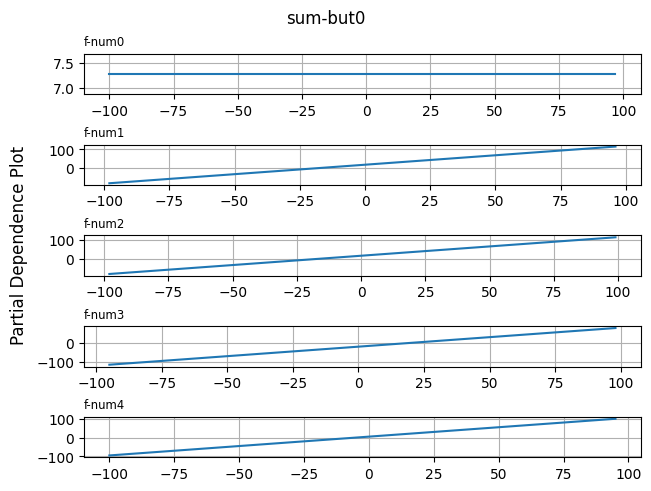

In [6]:
pdp_results.plot()

In [7]:
def create_random_dataframe_classifier():
    X, _ = make_classification(n_samples=5000, n_features=5, n_classes=2,
                               n_clusters_per_class=2, class_sep=2, flip_y=0, random_state=23)

    return pd.DataFrame({
        'x1': X[:, 0],
        'x2': X[:, 1],
        'x3': X[:, 2],
        'x4': X[:, 3],
        'x5': X[:, 4],
    })

In [8]:
df = create_random_dataframe_classifier()
df.head()

,x1,x2,x3,x4,x5
0,-2.124064,1.608138,-0.404920,0.942188,-2.754050
1,3.048919,-2.428100,0.427166,-1.466329,4.053088
2,2.241751,-2.109687,-0.410332,-1.386671,3.250637
3,3.299680,-1.386333,0.149882,-0.406165,3.351016
4,2.226471,-0.992053,-0.475162,-0.327913,2.308332


In [9]:
class_model = TestModels.getLinearThresholdModel([0.1, 0.2, 0.3, 0.4, 0.5], 0)


In [10]:
class_pdp_results = pdp_explainer.explain(class_model, df)
class_pdp_results.as_dataframe()

,-3.176352,-3.007164,-2.730154,-2.725931,-2.690126,-2.637724,-2.631791,-2.608869,-2.595924,-2.522616,...,2.972526,3.091173,3.120251,3.268394,3.336480,3.346023,3.362623,3.468502,3.712694,3.753402
0,false,false,false,false,false,false,false,false,false,false,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,true,true,true,true,true,true,true,true,true,true


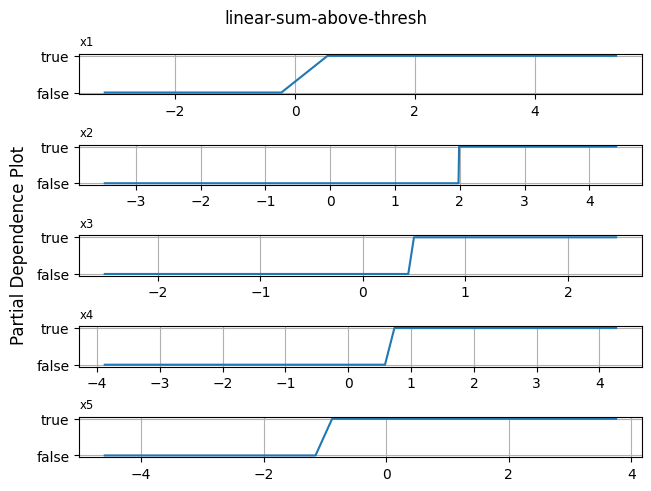

In [11]:
class_pdp_results.plot()